In [3]:
import readfargo3d as fg
import numpy as pl
import numpy as np
import matplotlib.pyplot as plt

itime = 60

path2d = './bae2017_01jup1400x512/' #2D
path3d = './p3disof_01jup/' #./p3disof_1Mjup_1400x512_60zones/
path3d2 = './p3disof_01jup/' #./p3disof_1Mjup_2800x1024x122/

fargo2d    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=False,dir=path2d)
fargo2d_init    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=False,dir=path2d)

fargo3d    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=True,dir=path3d)
fargo3d_init    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=True,dir=path3d)

fargo3d2    = fg.frame(itime,rho=True,vphi=True,vr=True,vtheta=True,dir=path3d2)
fargo3d_init2    = fg.frame(0,rho=True,vphi=True,vr=True,vtheta=True,dir=path3d2)

print('orbit '+ str(itime*10))

orbit 600


In [20]:
#calculation code

phi3 = np.loadtxt(path3d +'domain_x.dat')
rad3  = np.loadtxt(path3d +'domain_y.dat')
theta3  = np.loadtxt(path3d +'domain_z.dat')
phi3   = 0.5*(phi3[:-1] + phi3[1:])                                                                              
rad3   = 0.5*(rad3[4:-3] + rad3[3:-4])
theta3   = 0.5*(theta3[4:-3] + theta3[3:-4])
rad3d, phi3d, theta3d = (np.meshgrid(rad3, phi3, theta3))
nx = len(phi3)
ny = len(rad3)
nz = len(theta3)


rho_init3d   = pl.fromfile(path3d +'gasdens0.dat').reshape(nz,ny,nx).T
rho3d        = pl.fromfile(path3d+'gasdens' + str(itime) + '.dat').reshape(nz,ny,nx).T
vphi_init3d  = pl.fromfile(path3d + 'gasvx0.dat').reshape(nz,ny,nx).T
vphi3d       = pl.fromfile(path3d+'gasvx' + str(itime) + '.dat').reshape(nz,ny,nx).T
vrad3d       = pl.fromfile(path3d+'gasvy' + str(itime) + '.dat').reshape(nz,ny,nx).T
vrad_init3d  = pl.fromfile(path3d+'gasvy0.dat').reshape(nz,ny,nx).T
vtheta3d     = pl.fromfile(path3d+'gasvz' + str(itime) + '.dat').reshape(nz,ny,nx).T
vtheta_init3d  = pl.fromfile(path3d+'gasvz0.dat').reshape(nz,ny,nx).T
omegap3d     = np.loadtxt(path3d+'planet0.dat')[itime][-1]
#vphi3d      += 2*omegap3d*rad3d
omegapinit3d = np.loadtxt(path3d+'planet0.dat')[0][-1]
#vphi_init3d += 2*omegapinit3d*rad3d #increasing the multiple of omegap greatly reduces noise, acts as a smoothing function.

#cylindrical:
R3d = rad3d*np.cos(theta3d)
P3d = phi3d
Z3d = rad3d*np.sin(theta3d)
vR3d = vrad3d*np.sin(theta3d)
vZ3d = vrad3d*np.cos(theta3d)
vP3d = vphi3d
vR_init3d = vrad_init3d*np.sin(theta3d)
vZ_init3d = vrad_init3d*np.cos(theta3d)
vP_init3d = vphi_init3d
#-------------------------3D 1 -------------------------

dphi3d = ((phi3d[1:,1:,1:]-phi3d[:-1,:-1,:-1]))#[0,:,0] #shape 1399
drad3d = (rad3d[1:,1:,1:]-rad3d[:-1,:-1,:-1])#[:,0,0] #shape 511
dtheta3d = (theta3d[1:,1:,1:]-theta3d[:-1,:-1,:-1])#[0,0,:] #shape 65
dvphi3d = vphi3d[1:,1:,1:]-vphi3d[:-1,:-1,:-1]
dvtheta3d = (vtheta3d[1:,1:,1:]-vtheta3d[:-1,:-1,:-1]) #shape 511
dvrad3d = vrad3d[1:,1:,1:]-vrad3d[:-1,:-1,:-1]

pv_theta = (rad3d*vphi3d)[1:,1:,1:]-(rad3d*vphi3d)[:-1,:-1,:-1]
pv_theta /= (drad3d)
pv_theta -= (dvrad3d/dphi3d)
pv_theta /= (rad3d[1:,1:,1:])
#pv_theta += 2*omegap3d#*rad3d
pv_theta /= rho3d[1:,1:,1:]

dR3d = R3d[1:,1:,1:]-R3d[:-1,:-1,:-1]
dP3d = dphi3d
dZ3d = Z3d[1:,1:,1:]-Z3d[:-1,:-1,:-1]
dvR3d = vR3d[1:,1:,1:]-vR3d[:-1,:-1,:-1]
dvP3d = vP3d[1:,1:,1:]-vP3d[:-1,:-1,:-1]
dvZ3d = vZ3d[1:,1:,1:]-vZ3d[:-1,:-1,:-1]

pv_theta_cyl = (R3d*vP3d)[1:,1:,1:]-(R3d*vP3d)[:-1,:-1,:-1]
pv_theta_cyl /= dR3d
pv_theta_cyl -= (dvR3d/dP3d)
pv_theta_cyl /= R3d[1:,1:,1:]
pv_theta_cyl += 2*omegap3d
pv_theta_cyl /= rho3d[1:,1:,1:]

#------------------------------3d initial conditions--------------------------------------
dvphi_init3d = vphi_init3d[1:,1:,1:]-vphi_init3d[:-1,:-1,:-1]
dvtheta_init3d = (vtheta_init3d[1:,1:,1:]-vtheta_init3d[:-1,:-1,:-1]) #shape 511
dvrad_init3d = (vrad_init3d[1:,1:,1:]-vrad_init3d[:-1,:-1,:-1])

pv_theta_init = (rad3d*vphi_init3d)[1:,1:,1:]-(rad3d*vphi_init3d)[:-1,:-1,:-1]
pv_theta_init /= (drad3d)
pv_theta_init -= (dvrad_init3d/dphi3d)
pv_theta_init *= (1/rad3d)[1:,1:,1:]
#pv_theta_init += 2*omegapinit3d#*rad3d
pv_theta_init /= rho_init3d[1:,1:,1:]

dvR_init3d = vR_init3d[1:,1:,1:]-vR_init3d[:-1,:-1,:-1]
dvP_init3d = vP_init3d[1:,1:,1:]-vP_init3d[:-1,:-1,:-1]
dvZ_init3d = vZ_init3d[1:,1:,1:]-vZ_init3d[:-1,:-1,:-1]

pv_theta_init_cyl = (R3d*vP_init3d)[1:,1:,1:]-(R3d*vP_init3d)[:-1,:-1,:-1]
pv_theta_init_cyl /= dR3d
pv_theta_init_cyl -= (dvR_init3d/dP3d)
pv_theta_init_cyl /= R3d[1:,1:,1:]
pv_theta_init_cyl += 2*omegapinit3d
pv_theta_init_cyl /= rho_init3d[1:,1:,1:]

print('done') #dphi[0,:,0], drad[:,0,0], dtheta[0,0,:], dvtheta3d[:,0,0]

done


In [32]:
rad3d, phi3d, theta3d = (np.meshgrid(fargo3d.r,fargo3d.phi,fargo3d.theta))
print(rad3d[0,:,0].shape)
phi3d, rad3d, theta3d = (np.meshgrid(fargo3d.phi,fargo3d.r,fargo3d.theta))
print(rad3d[0,:,0].shape)

(512,)
(1400,)


In [8]:
#-------------------------3D 2 -------------------------
phi3 = np.loadtxt(path3d2 +'domain_x.dat')
rad3  = np.loadtxt(path3d2 +'domain_y.dat')
theta3  = np.loadtxt(path3d2 +'domain_z.dat')
phi3   = 0.5*(phi3[:-1] + phi3[1:])                                                                              
rad3   = 0.5*(rad3[3:-4] + rad3[4:-3])
theta3   = 0.5*(theta3[3:-4] + theta3[4:-3])
rad3d2, phi3d2, theta3d2 = (np.meshgrid(rad3, phi3, theta3))
ny = len(rad3)
nz = len(theta3)
nx = len(phi3)
rho_init3d2   = pl.fromfile(path3d2+'gasdens0.dat').reshape(nz,ny,nx).T
rho3d2        = pl.fromfile(path3d2+'gasdens' + str(itime) + '.dat').reshape(nz,ny,nx).T
vphi_init3d2  = pl.fromfile(path3d2+'gasvx0.dat').reshape(nz,ny,nx).T
vphi3d2       = pl.fromfile(path3d2+'gasvx' + str(itime) + '.dat').reshape(nz,ny,nx).T
vrad3d2       = pl.fromfile(path3d2+'gasvy' + str(itime) + '.dat').reshape(nz,ny,nx).T
vrad_init3d2  = pl.fromfile(path3d2+'gasvy0.dat').reshape(nz,ny,nx).T
vtheta3d2     = pl.fromfile(path3d2+'gasvz' + str(itime) + '.dat').reshape(nz,ny,nx).T
vtheta_init3d2= pl.fromfile(path3d2+'gasvz0.dat').reshape(nz,ny,nx).T
omegap3d2     = np.loadtxt(path3d2+'planet0.dat')[itime][-1]
#vphi3d2      += omegap3d2*rad3d2
omegapinit3d2 = np.loadtxt(path3d2+'planet0.dat')[0][-1]
#vphi_init3d2 += omegapinit3d2*rad3d2

#-------------------------3d 1 -------------------------

dphi3d2 = np.abs(phi3d2[1:,1:,1:]-phi3d2[:-1,:-1,:-1]) 
drad3d2 = np.abs(rad3d2[1:,1:,1:]-rad3d2[:-1,:-1,:-1]) #shape 1399, 511, 65
dtheta3d2 = np.abs(theta3d2[1:,1:,1:]-theta3d2[:-1,:-1,:-1])#
dvphi3d2 = vphi3d2[1:,1:,1:]-vphi3d2[:-1,:-1,:-1]
dvtheta3d2 = vtheta3d2[1:,1:,1:]-vtheta3d2[:-1,:-1,:-1]
dvrad3d2 = vrad3d2[1:,1:,1:]-vrad3d2[:-1,:-1,:-1]

pv_theta2 = (rad3d2*vphi3d2)[1:,1:,1:]-(rad3d2*vphi3d2)[:-1,:-1,:-1]
pv_theta2 /= (drad3d2)
pv_theta2 -= (dvrad3d2/dphi3d2)
pv_theta2 *= (1/rad3d2)[1:,1:,1:]
pv_theta2 /= rho3d2[1:,1:,1:]

#------------------------------3d initial conditions--------------------------------------
dvphi_init3d2 = vphi_init3d2[1:,1:,1:]-vphi_init3d2[:-1,:-1,:-1]
dvtheta_init3d2 = vtheta_init3d2[1:,1:,1:]-vtheta_init3d2[:-1,:-1,:-1]
dvrad_init3d2 = vrad_init3d2[1:,1:,1:]-vrad_init3d2[:-1,:-1,:-1]

pv_theta_init2 = (rad3d2*vphi_init3d2)[1:,1:,1:]-(rad3d2*vphi_init3d2)[:-1,:-1,:-1]
pv_theta_init2 /= (drad3d2)
pv_theta_init2 -= (dvrad_init3d2/dphi3d2)
pv_theta_init2 *= (1/rad3d2)[1:,1:,1:]
pv_theta_init2 /= rho_init3d2[1:,1:,1:]

#pv_rad2 = ((1/(rad3d2*np.sin(phi3d2))[1:,1:,1:])*(((vtheta2*np.sin(phi3d2))[1:,1:,1:]-(vtheta2*np.sin(phi3d2))[:-1,:-1,:-1])/dphi2 - (dvphi2/dtheta2)))/rho2[1:,1:,1:]
#pv_phi2 = ((1/(rad3d2)[1:,1:,1:])*((dvrad2)/(dtheta2*np.sin(phi3d2)[1:,1:,1:]) - (((rad3d2*vtheta2)[1:,1:,1:]-(rad3d2*vtheta2)[:-1,:-1,:-1])/drad2)))/rho2[1:,1:,1:]

print('done')

done


In [5]:
#-------------------------------------------2d-------------------------------
phi = np.loadtxt(path2d +'domain_x.dat')
rad  = np.loadtxt(path2d +'domain_y.dat')[3:-3]
phi   = 0.5*(phi[:-1] + phi[1:])                                                                              
rad   = 0.5*(rad[:-1] + rad[1:])
phi2d, rad2d = np.meshgrid(phi, rad)
nx = len(phi)
ny = len(rad)
rho_init2d   = pl.fromfile(path2d +'gasdens0.dat').reshape(ny,nx)
rho2d   = pl.fromfile(path2d+'gasdens' + str(itime) + '.dat').reshape(ny,nx)
vphi_init2d   = pl.fromfile(path2d + 'gasvx0.dat').reshape(ny,nx)
vphi2d   = pl.fromfile(path2d+'gasvx' + str(itime) + '.dat').reshape(ny,nx)
vrad2d     = pl.fromfile(path2d+'gasvy' + str(itime) + '.dat').reshape(ny,nx)
vrad_init2d = pl.fromfile(path2d+'gasvy0.dat').reshape(ny,nx)
omegap2d = np.loadtxt(path2d+'planet0.dat')[itime][-1]
#vphi2d += 2*omegap2d*rad2d
omegapinit2d = np.loadtxt(path2d+'planet0.dat')[0][-1]
#vphi_init2d += 2*omegapinit2d*rad2d

dphi2d = np.abs(fargo2d.phi[0]-fargo2d.phi[1])

pv_2d = ((rad2d*vphi2d)[1:,:]-(rad2d*vphi2d)[:-1,:])/(rad2d[1:]-rad2d[:-1])
pv_2d = pv_2d[:,:-1]
pv_2d -= ((vrad2d[:,1:]-vrad2d[:,:-1])/dphi2d)[1:,:]
pv_2d /= rad2d[:-1,:-1]
pv_2d /= rho2d[:-1,:-1]

pv_2d_init = ((rad2d*vphi_init2d)[1:,:]-(rad2d*vphi_init2d)[:-1,:])/(rad2d[1:]-rad2d[:-1]) 
pv_2d_init = pv_2d_init[:,:-1]
pv_2d_init -= ((vrad_init2d[:,1:]-vrad_init2d[:,:-1])/dphi2d)[1:,:]
pv_2d_init /= rad2d[:-1,:-1]
pv_2d_init /= rho_init2d[:-1,:-1]


print('done')

done


(-2.0, 5.0)

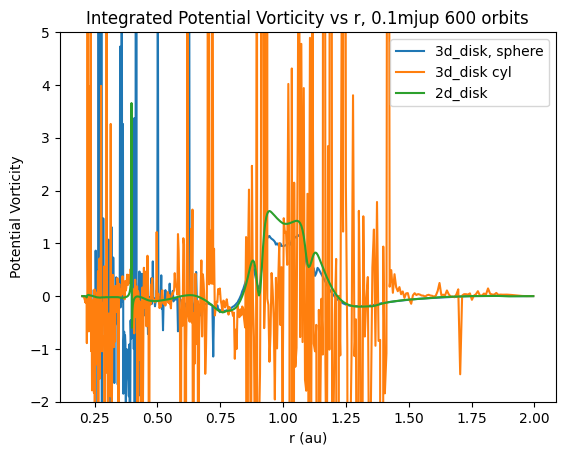

In [19]:
#PV versus R plot - integration
import scipy
#z = R*cos(theta), dz = dRcos(theta) - Rsin(theta)dtheta

#for integration:
#pv_im3d = 1/pv_theta
#pv_im3d *= ((drad3d*np.cos(theta3d[1:,1:,1:])) - (rad3d[1:,1:,1:]*np.sin(theta3d[1:,1:,1:])*dtheta3d))
#pv_im3d = 1/(pv_im3d.sum(axis=2))
#pv_im3d = 1/(((1/pv_theta[:,:,:])*rad3d[1:,1:,1:]).sum(axis=2))
pv_im3d = 1/(((1/pv_theta[:,:,:])).sum(axis=2))*drad3d[0,:,0]

#pv_im_init3d = 1/pv_theta_init
#pv_im_init3d *= ((drad3d*np.cos(theta3d[1:,1:,1:])) - (rad3d[1:,1:,1:]*np.sin(theta3d[1:,1:,1:])*dtheta3d))
#pv_im_init3d = 1/(pv_im_init3d.sum(axis=2))
#pv_im_init3d = 1/(((1/pv_theta_init[:,:,:])*rad3d[1:,1:,1:]).sum(axis=2))
pv_im_init3d = 1/(((1/pv_theta_init[:,:,:])).sum(axis=2))*drad3d[0,:,0]

#pv_im3d2 = 1/pv_theta2
#pv_im3d2 *= (drad3d2*np.cos(theta3d2[1:,1:,1:]) - rad3d2[1:,1:,1:]*np.sin(theta3d2[1:,1:,1:]*dtheta3d2))
#pv_im3d2 = 1/(pv_im3d2.sum(axis=2))
#pv_im3d2 = 1/(((1/pv_theta2[:,:,:])*rad3d2[1:,1:,1:]).sum(axis=2))
pv_im3d2 = 1/(((1/pv_theta2[:,:,:])).sum(axis=2))*drad3d2[0,:,0]

#pv_im_init3d2 = 1/pv_theta_init2
#pv_im_init3d2 *= (drad3d2*np.cos(theta3d2[1:,1:,1:]) - rad3d2[1:,1:,1:]*np.sin(theta3d2[1:,1:,1:])*dtheta3d2)
#pv_im_init3d2 = 1/(pv_im_init3d2.sum(axis=2))
#pv_im_init3d2 = 1/(((1/pv_theta_init2[:,:,:])*rad3d2[1:,1:,1:]).sum(axis=2))
pv_im_init3d2 = 1/(((1/pv_theta_init2[:,:,:])).sum(axis=2))*drad3d2[0,:,0]

pv_im_cyl3d = 1/(((1/pv_theta_cyl[:,:,:])).sum(axis=2))
pv_im_cyl_init3d = 1/(((1/pv_theta_init_cyl[:,:,:])).sum(axis=2))

plt.plot(fargo3d2.r[1:],((pv_im3d2-pv_im_init3d2)/pv_im_init3d2).mean(axis=0), label = '3d_disk, sphere', alpha = 1)
plt.plot(fargo3d.r[1:],((pv_im_cyl3d-pv_im_cyl_init3d)/pv_im_cyl_init3d).mean(axis=0), label = '3d_disk cyl')
plt.plot(fargo2d.r[1:],((pv_2d-pv_2d_init)/pv_2d_init).mean(axis=1), label = '2d_disk')
plt.legend()
plt.xlabel('r (au)')
plt.ylabel('Potential Vorticity')
plt.title('Integrated Potential Vorticity vs r, 0.1mjup '+str(itime*10)+' orbits')
plt.ylim(-2,5)
#plt.xlim(.5,2)
#plt.savefig('3dPV_01Mint_3dand2domega2'+str(itime*10)+'_orbits.png',dpi=300,bbox_inches='tight')

(-5.0, 10.0)

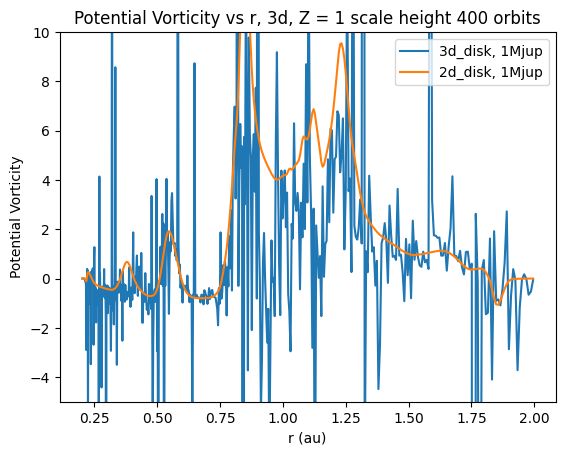

In [19]:
#PV versus R plot
import scipy
#z = R*cos(theta), dz = dRcos(theta) - Rsin(theta)dtheta

#for slice:
#pv_im3d = pv_theta[:,:,33]
#pv_im_init3d = pv_theta_init[:,:,33]

#pv_im3d2 = pv_theta2[:,:,33]
#pv_im_init3d2 = pv_theta_init2[:,:,33]

pv_im3d2 = 1/(((1/pv_theta2[:,:,:])).sum(axis=2))*drad3d2[0,:,0]
pv_im_init3d2 = 1/(((1/pv_theta_init2[:,:,:])).sum(axis=2))*drad3d2[0,:,0]

pv_adj = ((pv_im3d2-pv_im_init3d2)/pv_im_init3d2).mean(axis=0)

#pv_adj = scipy.ndimage.gaussian_filter1d(pv_adj,sigma=1)

#plt.plot(fargo3d.r[1:],((pv_im3d-pv_im_init3d)/pv_im_init3d).mean(axis=0), label = '3d_disk, 1Mjup 66 zones')
plt.plot(fargo3d2.r[1:],pv_adj, label = '3d_disk, 1Mjup')
plt.plot(fargo2d.r[1:],((pv_2d-pv_2d_init)/pv_2d_init).mean(axis=1), label = '2d_disk, 1Mjup')
plt.legend()
plt.xlabel('r (au)')
plt.ylabel('Potential Vorticity')
plt.title('Potential Vorticity vs r, 3d, Z = 1 scale height '+str(itime*10)+' orbits')
plt.ylim(-5,10)
#plt.xlim(.5,2)
#plt.savefig('3dPV_1Mint'+str(itime*10)+'_orbits.png',dpi=300,bbox_inches='tight')

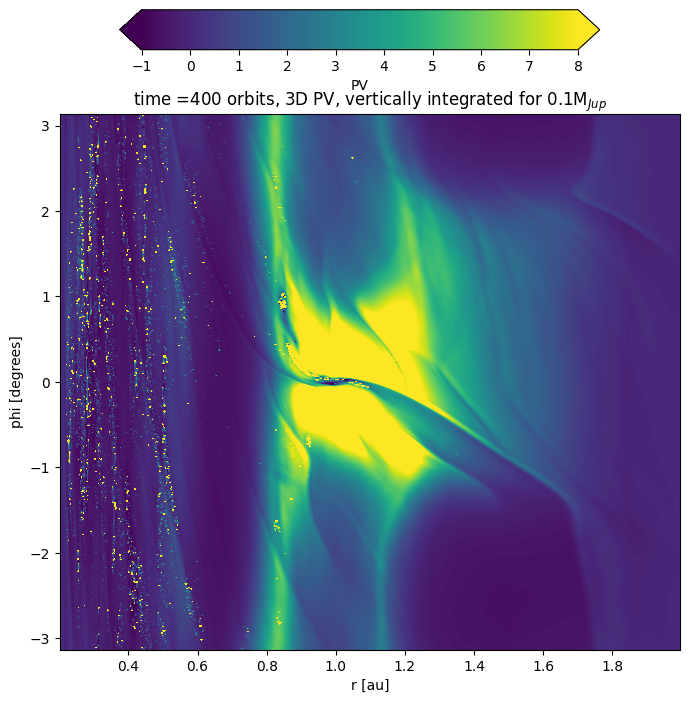

In [20]:
#r,phi - PV image
import matplotlib.ticker as ticker


fig, ax = plt.subplots(figsize=(8,8))
#for integration:
pv_im = 1/(((1/pv_theta[:,:,:])*rad3d[1:,1:,1:]).sum(axis=2))
pv_im_init = 1/(((1/pv_theta_init[:,:,:])*rad3d[1:,1:,1:]).sum(axis=2))

#for slice:
#pv_im = pv_theta[:,:,33]
#pv_im_init = pv_theta_init[:,:,33]
vmin = -1
vmax = 8
levels = np.linspace(vmin,vmax,128)
cp = ax.contourf(fargo3d.r[1:], fargo3d.phi[1:], (pv_im-pv_im_init)/pv_im_init, levels=levels,extend='both')

#ax.set_xlim(0.2,2)
#ax.set_ylim(160,170)
ax.set_xlabel('r [au]')
ax.set_ylabel('phi [degrees]')
ax.set_title(f'time ='+ str(itime*10) +' orbits, 3D PV, vertically integrated for 0.1M$_{Jup}$')
cax = fig.add_axes([0.2, 0.9, 0.6, 0.05])
cbar = fig.colorbar(cp, cax=cax, orientation='horizontal')
cbar.ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Adjust the position of the colorbar label above the colorbar
cbar.set_label('PV', position=(0.5, 5.5))
fig.subplots_adjust(top=0.82, bottom=0.15)
#plt.savefig('PV_3dimage_01Mjup_1000orbit.png',dpi = 300)

In [ ]:
#r,z - PV image
vmin = -5
vmax = 30
levels = np.linspace(vmin,vmax,128)
R = (rad3d*np.sin(theta3d))[0,1:,33]
Z = (np.cos(theta3d)*rad3d)[0,0,1:]
fig, ax = plt.subplots(figsize=(8,8))
cp = ax.contourf(R,Z,(((pv_theta-pv_theta_init)/pv_theta_init).mean(axis=0)).T, levels=levels,extend='both')
#ax.set_xlim(0.2,2)(
#ax.set_ylim(0,max(Z))
ax.set_ylabel('z')
ax.set_xlabel('r [au]')
ax.set_title(f'time ='+ str(itime*10) +' orbits, 3d PV, azithumally averaged')
cax = fig.add_axes([0.2, 0.9, 0.6, 0.05])
fig.colorbar(cp, cax=cax,orientation='horizontal')
fig.subplots_adjust(top=0.82, bottom=0.15)
plt.savefig('PV_rz_3d1M.png',dpi = 300)

In [ ]:
plt.plot(fargo3d.phi[1:],pv_

In [ ]:
#phi,z - PV image
vmin = 0
vmax = 20
levels = np.linspace(vmin,vmax,128)
R = (rad3d*np.sin(theta3d))[0,1:,33]
Z = (np.cos(theta3d)*rad3d)[0,0,1:]
fig, ax = plt.subplots(figsize=(8,8))
cp = ax.contourf(fargo3d.phi[1:]*180/np.pi,Z,(((pv_theta[:,:,:]-pv_theta_init[:,:,:])/pv_theta_init[:,:,:]).mean(axis=1)).T, levels=levels,extend='both')
#ax.set_xlim(0.2,2)
#ax.set_ylim(0,max(Z))
ax.set_xlabel('phi')
ax.set_ylabel('z')
ax.set_title(f'time ='+ str(itime*10) +' orbits, 3d PV, radially averaged')
cax = fig.add_axes([0.2, 0.9, 0.6, 0.05])
fig.colorbar(cp, cax=cax,orientation='horizontal')
fig.subplots_adjust(top=0.82, bottom=0.15)
#plt.savefig('PV_3dimage3mavg.png',dpi = 300)